# ANN

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Dense, Flatten 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [8]:
classes = ['airplane','automobiles','bird','cat','deer','dog','frog','horse','ship','truck']

Text(0.5, 0, 'dog')

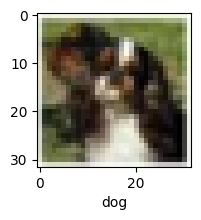

In [9]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[500])
plt.xlabel(classes[y_train[500]])

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
model = Sequential()

model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(3000,activation="relu"))
model.add(Dense(1000,activation="relu"))
model.add(Dense(10,activation="softmax"))

C:\Users\abhis\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3000)           │     9,219,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     3,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,230,010 (46.65 MB)

 Trainable params: 12,230,010 (46.65 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="SGD",metrics = ['accuracy'])

In [14]:
model.fit(X_train,y_train,epochs = 5,validation_split=0.2)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.2953 - loss: 1.9559 - val_accuracy: 0.3627 - val_loss: 1.7684
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.4084 - loss: 1.6713 - val_accuracy: 0.4131 - val_loss: 1.6698
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.4410 - loss: 1.5820 - val_accuracy: 0.4475 - val_loss: 1.5832
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.4666 - loss: 1.5107 - val_accuracy: 0.4089 - val_loss: 1.6939
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.4813 - loss: 1.4714 - val_accuracy: 0.4652 - val_loss: 1.5280


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification Report: \n', classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.50      0.54      1000
           1       0.65      0.53      0.58      1000
           2       0.30      0.47      0.36      1000
           3       0.36      0.30      0.32      1000
           4       0.35      0.45      0.39      1000
           5       0.43      0.29      0.35      1000
           6       0.48      0.59      0.53      1000
           7       0.59      0.46      0.52      1000
           8       0.53      0.68      0.59      1000
           9       0.64      0.44      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.47     10000
weighted avg       0.49      0.47      0.47     10000



In [16]:
classes[y_pred_classes[400]]

'truck'

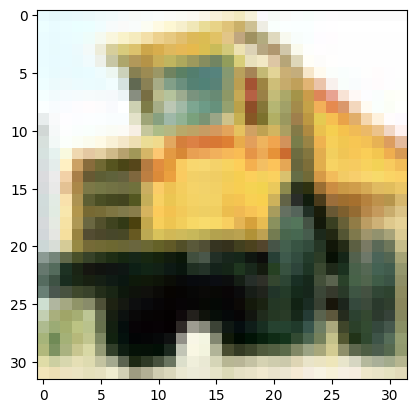

In [17]:
plt.imshow(X_test[400])

# CNN

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [19]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation= 'relu', input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation= 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

C:\Users\abhis\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [22]:
model.fit(X_train,y_train, epochs = 20, validation_split=0.2)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3480 - loss: 1.7772 - val_accuracy: 0.5423 - val_loss: 1.2718
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5722 - loss: 1.2163 - val_accuracy: 0.6121 - val_loss: 1.1049
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6389 - loss: 1.0467 - val_accuracy: 0.6383 - val_loss: 1.0503
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6721 - loss: 0.9522 - val_accuracy: 0.6339 - val_loss: 1.0450
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6915 - loss: 0.8817 - val_accuracy: 0.6502 - val_loss: 1.0361
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7157 - loss: 0.8251 - val_accuracy: 0.6697 - val_loss: 0.9624
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7363 - loss: 0.7629 - val_accuracy: 0.6636 - val_loss: 0.9958
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7527 - loss: 0.7174 -

In [23]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6725 - loss: 1.3143


[1.3368977308273315, 0.6696000099182129]

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification Report: \n', classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.79      0.70      1000
           1       0.83      0.75      0.79      1000
           2       0.57      0.56      0.56      1000
           3       0.50      0.51      0.50      1000
           4       0.61      0.57      0.59      1000
           5       0.55      0.64      0.59      1000
           6       0.78      0.69      0.73      1000
           7       0.75      0.69      0.72      1000
           8       0.84      0.72      0.77      1000
           9       0.73      0.78      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [25]:
classes[y_pred_classes[2]]

'ship'

Text(0.5, 0, 'ship')

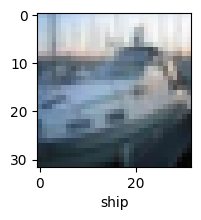

In [26]:
plt.figure(figsize=(15,2))
plt.imshow(X_test[2])
plt.xlabel(classes[y_test[2]])